# 14. Segmentation – K-means

Segment some color images using the K-means algorithm – kmeans(). Try different parameters for the number of
clusters, the initial centers of the clusters (see KmeansFlags), the termination criteria and the number of attempts.

In [10]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = './data'
FILENAME = 'match_view01_1.jpg'

img = cv2.imread(os.path.join(DATA_DIR, FILENAME))

In [13]:
K = 6

Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

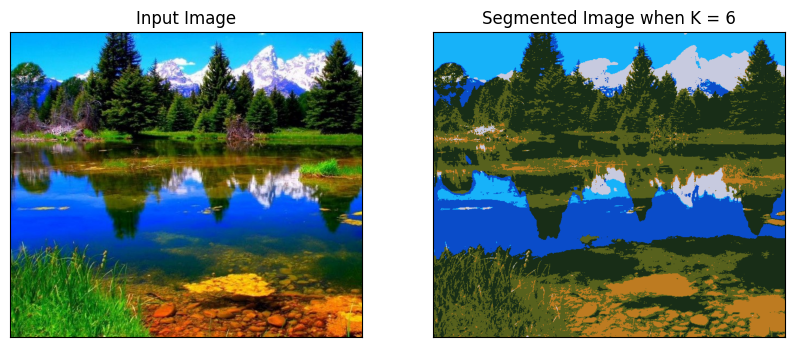

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) , cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()